In [41]:
import sys
import pandas as pd
import matplotlib.pyplot as plt
from os.path import join

config_dir = "../config"
if config_dir not in sys.path:
    sys.path.insert(0, config_dir)

from config import add_to_path, root_dir, google_folder_id, download_dir
add_to_path(join(root_dir, 'src'))
import utils.preprocessing as preprocessing
from data_loader import load_data
import anomaly_detection.statistic as stat

Already in sys: c:\Users\Utilisateur\Desktop\reading_seminar\Application données\Code\Projet-recheche-INSA-anomaly-detection-librairy\src


# Méthodes statistiques de detection d'anomalie

1. Le Z-Score Glissant

In [71]:
data_dict, extracted_dir = load_data(
    file_id=google_folder_id,
    work_dir=join(download_dir, "gdrive_tar_data"),
    tar_name="data.tar",
    pattern="*.csv",
)

list_keys = list(data_dict.keys())
df = data_dict[list_keys[11]]
display(df.head())
display(df.describe())

,datetime,nwl1,nwl2,nwl3,nwl4,fprd1,fprd2,fprd3,fprd4,pstr1,pstr3,astrw,g2,ny,vcrf,v2
0,2024-04-11T06:15:34.576,1906.03,2014.48,1996.33,1976.68,3840.61,4616.45,6065.32,6495.68,6.25723,5.15724,1.64502,-0.157973,-0.519341,247.736,4.15881
1,2024-04-11T06:15:34.586,1907.93,2016.84,1991.96,1967.32,4100.26,4201.48,6665.08,6909.88,4.65494,3.08827,1.65310,-0.146093,-0.587319,247.824,4.12740
2,2024-04-11T06:15:34.596,1917.43,2010.94,1998.52,1976.68,3948.41,3772.60,6563.21,7276.02,3.96825,3.45657,1.57228,-0.039176,-0.519341,247.913,2.87066
3,2024-04-11T06:15:34.606,1908.88,2018.02,1996.33,1978.75,3678.33,4417.08,7130.10,7907.61,4.76939,3.06661,1.65310,-0.134213,-0.519341,248.001,1.58251
4,2024-04-11T06:15:34.616,1912.68,2019.20,1995.24,1966.28,3527.64,3655.52,8347.71,9429.36,4.10350,2.15670,1.58844,-0.146093,-0.791255,248.090,1.99095


,nwl1,nwl2,nwl3,nwl4,fprd1,fprd2,fprd3,fprd4,pstr1,pstr3,astrw,g2,ny,vcrf,v2
count,9536.000000,9536.000000,9536.000000,9536.000000,9536.00000,9536.000000,9536.000000,9536.000000,9536.000000,9536.000000,9536.000000,9536.000000,9536.000000,9536.000000,9536.000000
mean,1471.350516,1481.044916,1509.576523,1511.090816,1830.60927,2869.653044,4854.339925,5193.665462,31.795623,38.251356,7.651030,0.208424,3.820289,195.712352,0.338013
std,565.936636,695.186277,643.785108,610.186476,2789.37679,2841.851307,3900.905550,5237.556876,23.928644,29.226638,26.518798,1.391533,20.503614,68.738451,3.445989
min,387.277000,173.235000,221.631000,323.929000,-6368.03000,-4253.270000,-5325.200000,-10291.800000,-0.755378,-2.707000,-49.621200,-4.113890,-44.399500,64.288500,-12.210100
25%,973.076500,869.309000,957.084000,985.028000,-788.16600,670.165250,2138.120000,1289.650000,13.860300,16.430975,-2.398170,-0.529211,-4.983270,135.791000,-1.810660
50%,1440.620000,1430.240000,1478.350000,1479.810000,1966.27000,3049.300000,4251.250000,4206.170000,28.491600,29.226600,2.598740,0.127139,0.783583,190.923000,0.200110
75%,1914.580000,2024.215000,2003.162500,1980.830000,3867.27000,5133.420000,7595.120000,9074.670000,38.180700,58.135225,14.795000,1.267580,16.769900,249.528000,2.305140
max,2461.680000,2697.870000,2626.880000,2574.370000,13851.00000,13810.700000,19642.900000,27800.300000,178.316000,146.757000,119.712000,3.655390,68.762200,314.725000,16.003500


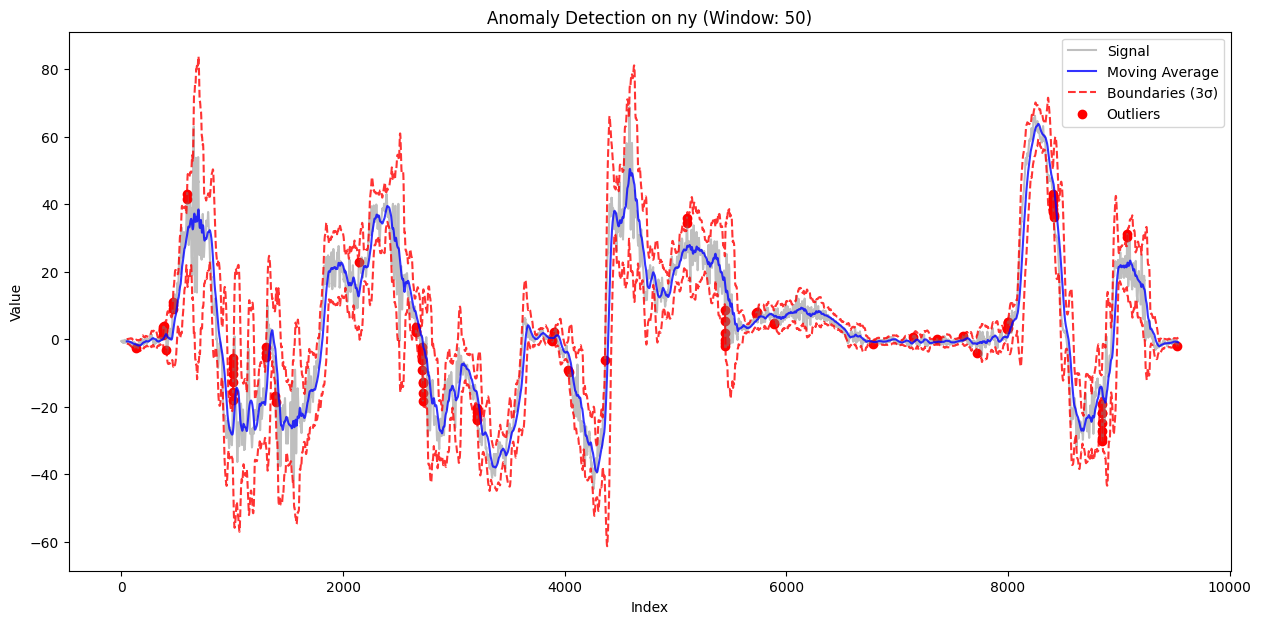

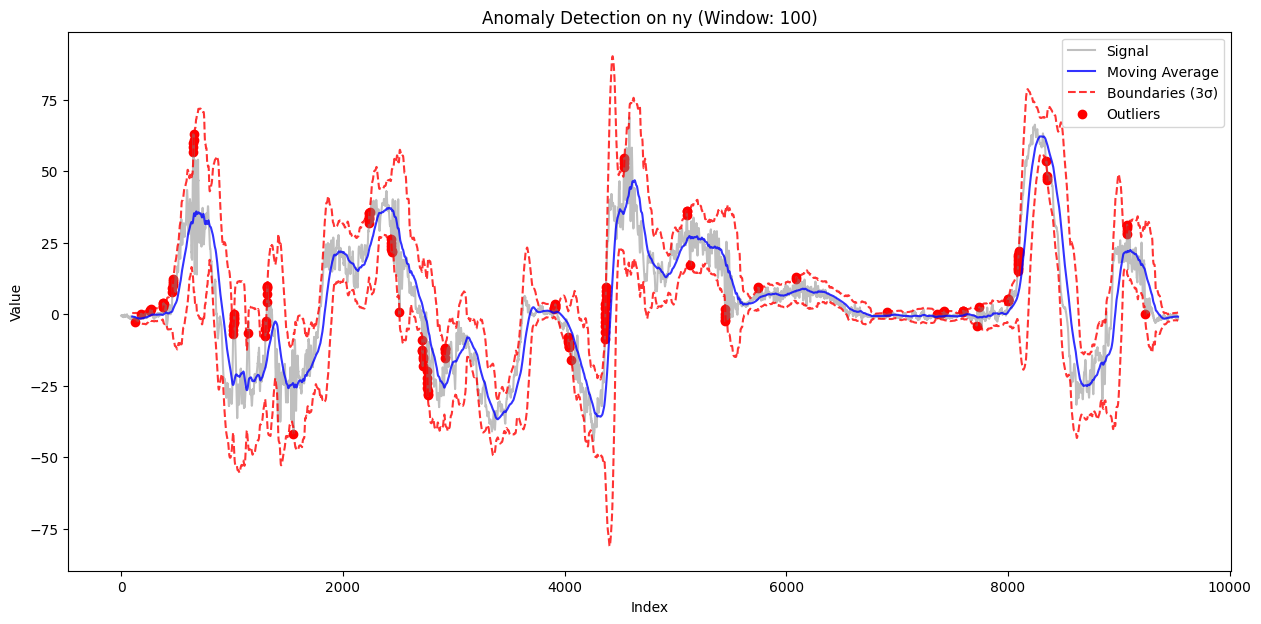

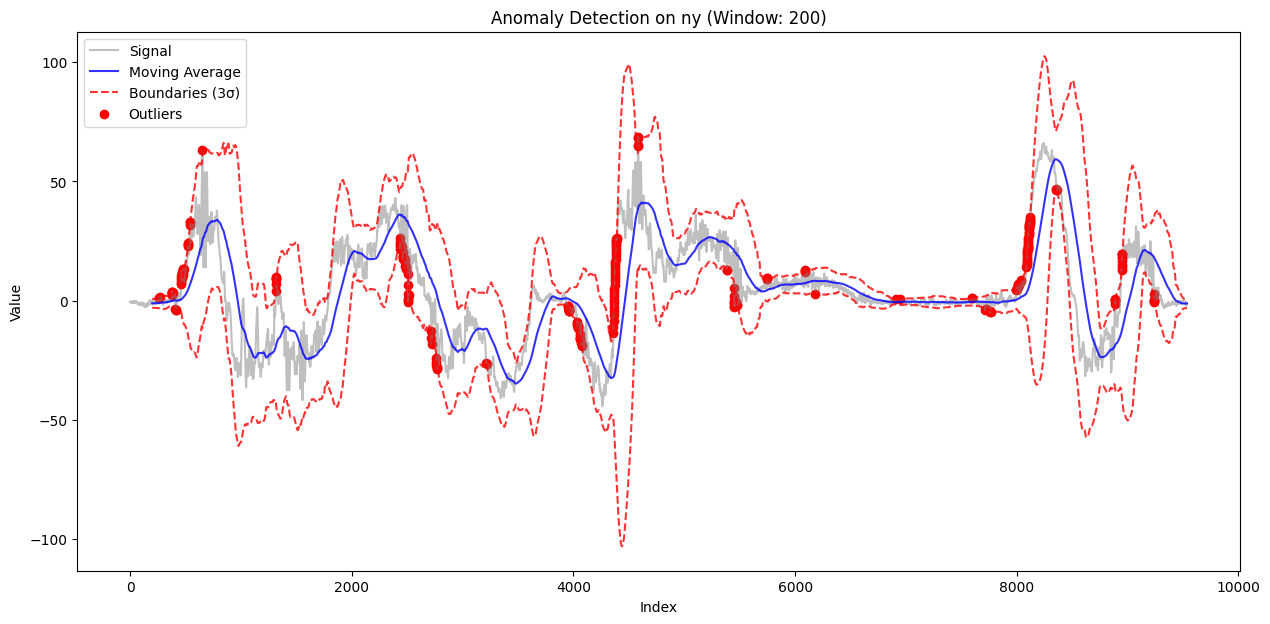

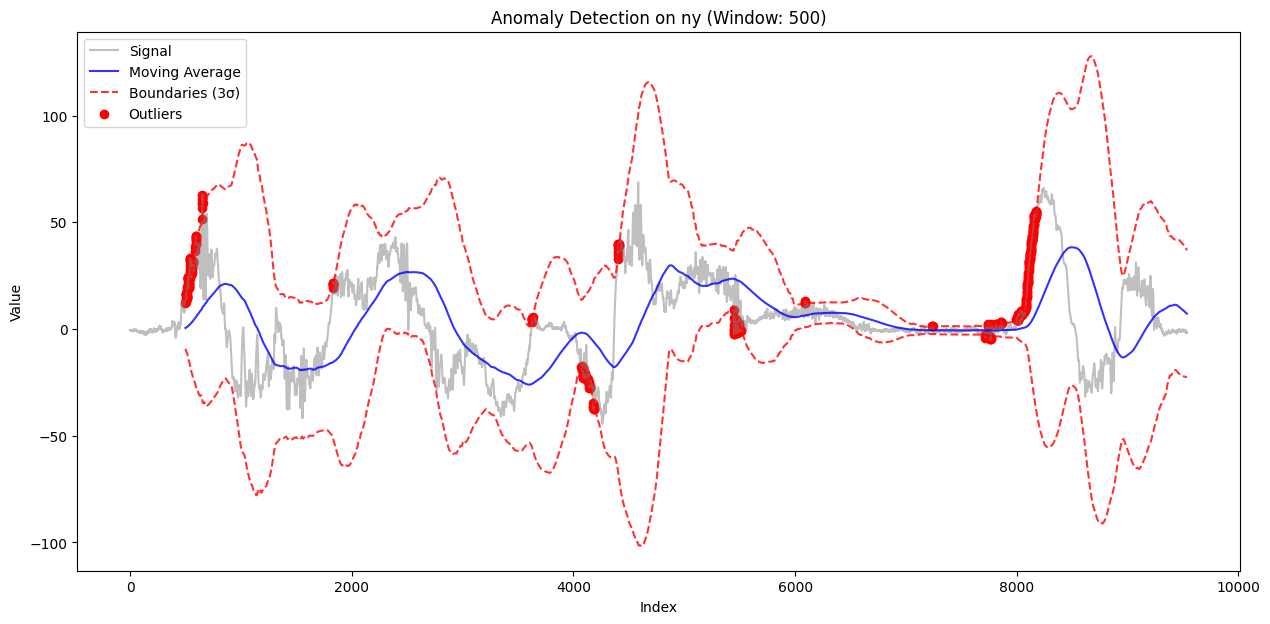

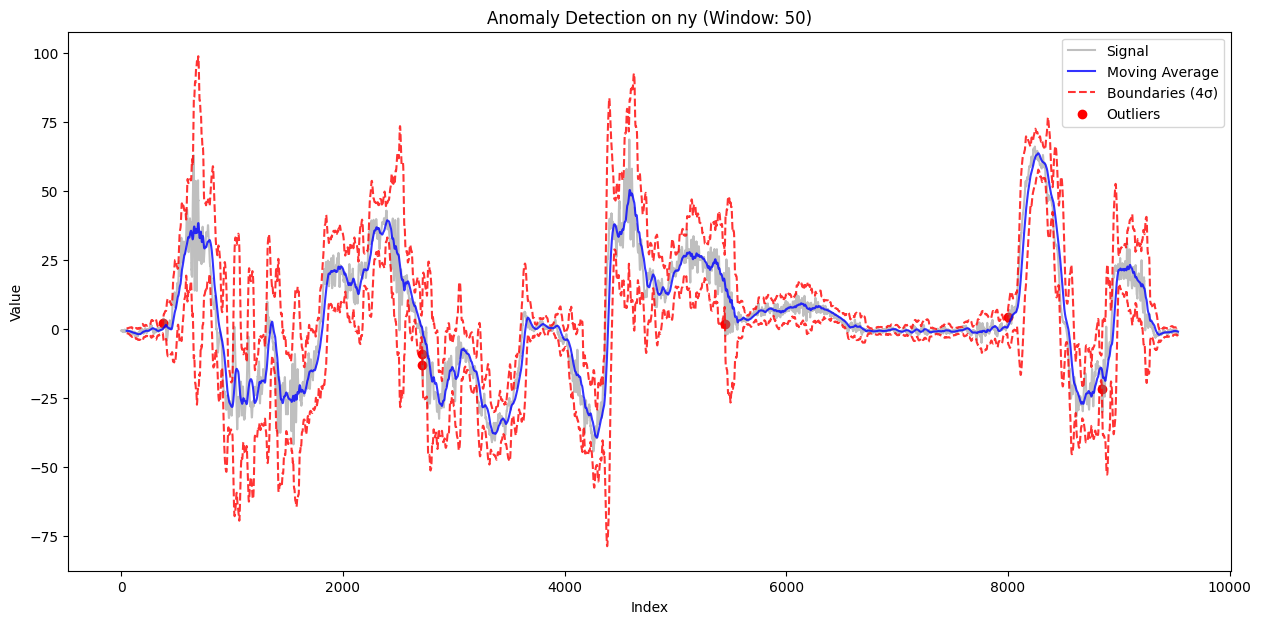

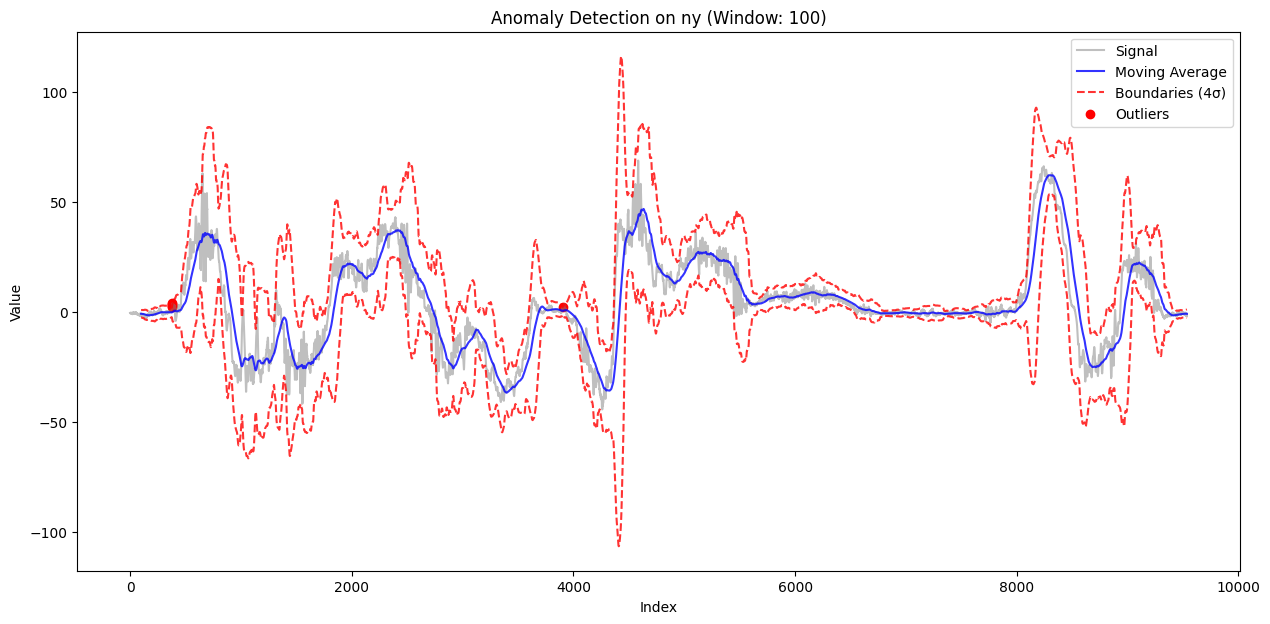

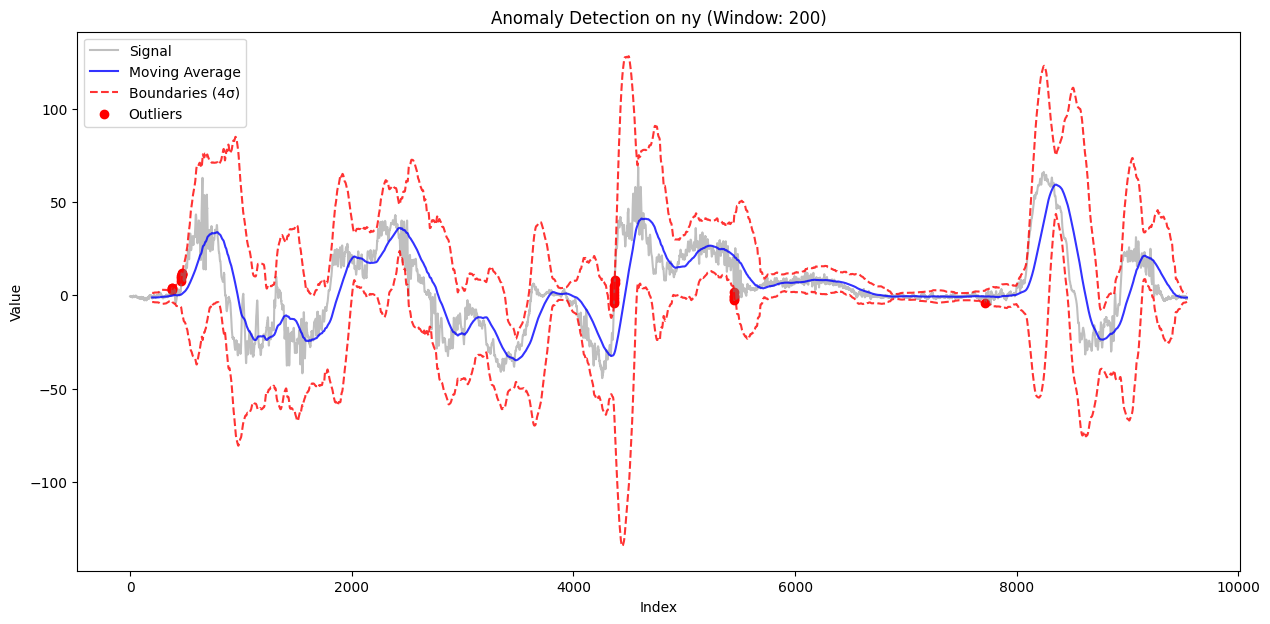

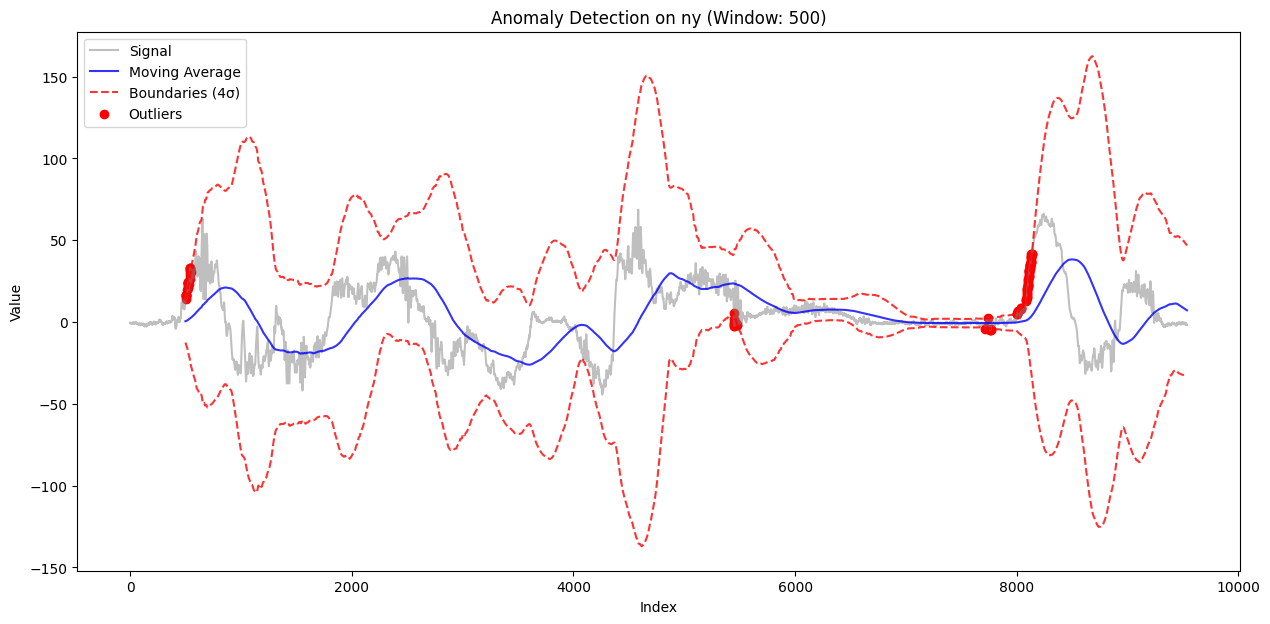

In [ ]:
#Choix de la taille de la fenêtre pour la colonne 'ny'
for win_size in (50,100,200,500):
    outlier_pstr1=stat.zscore_glissant(window_size=win_size,df_column=df['ny'],threshold=3)


La détection des valeurs aberrantes s'avère sensible au choix de la taille de la fenêtre glissante. Il n'existe pas de règle universelle pour déterminer ce paramètre, il qui dépend de la dynamique du signal. Quant au seuil de décision, nous avons fixé la valeur à 3, un standard reconnu dans la littérature, mais semble trop bas dans cette étude.

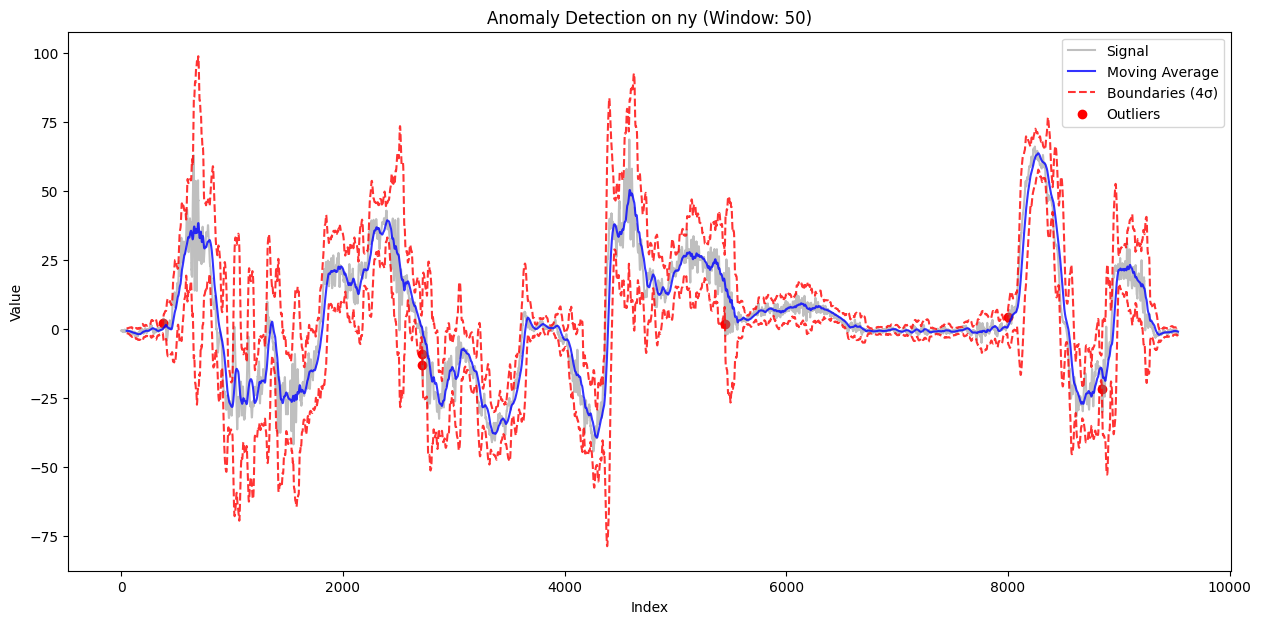

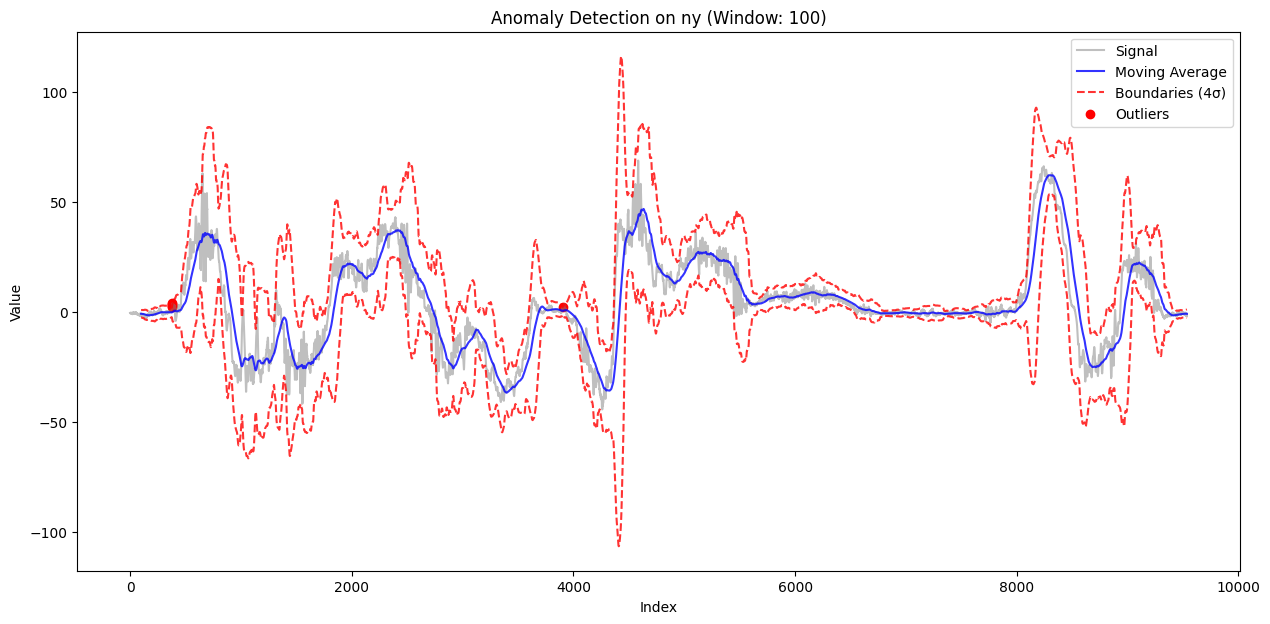

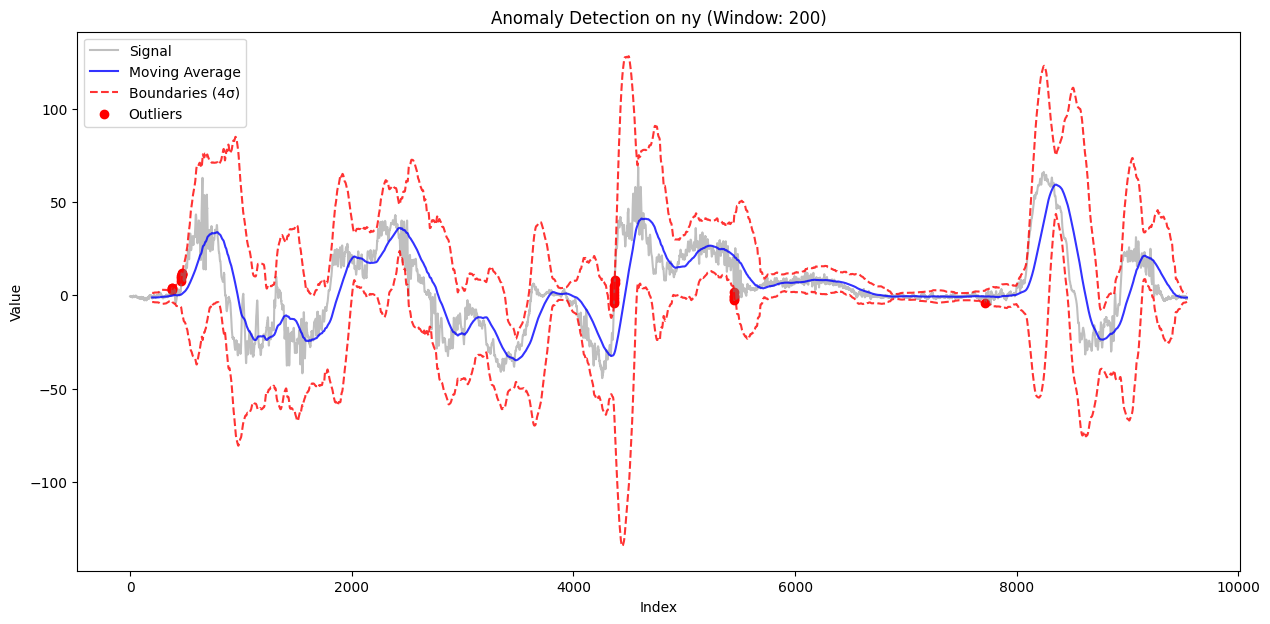

In [74]:
#même étude pour un seuil plus élevé
for win_size in (50,100,200):
    outlier_pstr1=stat.zscore_glissant(window_size=win_size,df_column=df['ny'],threshold=4)